# Classification models churn prediction in banking
In this project we build an AI-based model that helps you assess the chance that customers will churn within banking. The dataset we use for our model is from kaggle at the following link: https://www.kaggle.com/mathchi/churn-for-bank-customers
Content

    RowNumber—corresponds to the record (row) number and has no effect on the output.
    CustomerId—contains random values and has no effect on customer leaving the bank.
    Surname—the surname of a customer has no impact on their decision to leave the bank.
    CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
    Geography—a customer’s location can affect their decision to leave the bank.
    Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
    Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
    Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
        Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
        NumOfProducts—refers to the number of products that a customer has purchased through the bank.
        HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
        IsActiveMember—active customers are less likely to leave the bank.
        EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
        Exited—whether or not the customer left the bank.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible. 

### Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [2]:
df= pd.read_csv("data/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df= df.drop(["RowNumber", "CustomerId", "Surname"], axis= 1)

In [5]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Balance dataset

In [9]:
#g = df.groupby('Exited')
#new_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
new_df= df

In [10]:
new_df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
new_df.shape

(10000, 11)

In [12]:
#find null values in the dataset
print(new_df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [13]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<BarContainer object of 10000 artists>

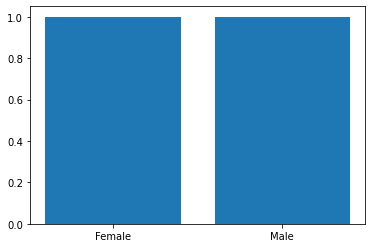

In [15]:
plt.bar(df["Gender"], df["Exited"])

<BarContainer object of 10000 artists>

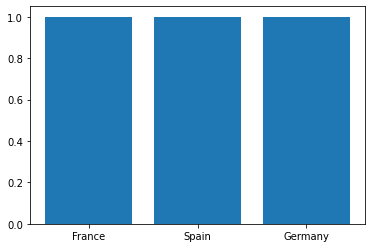

In [16]:
plt.bar(df["Geography"], df["Exited"])

### Classification

Logistic Regression = 80%, balanced data= 66% (no overfitting)

Random Forest = 87%, Balanced data= 78%

Knn = 77%, Balanced data= 51% (with cross-validation the performormance similar as without)

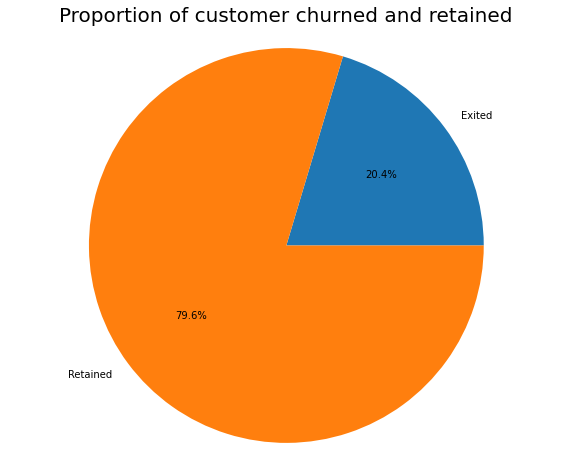

In [17]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%') #autopct= %
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

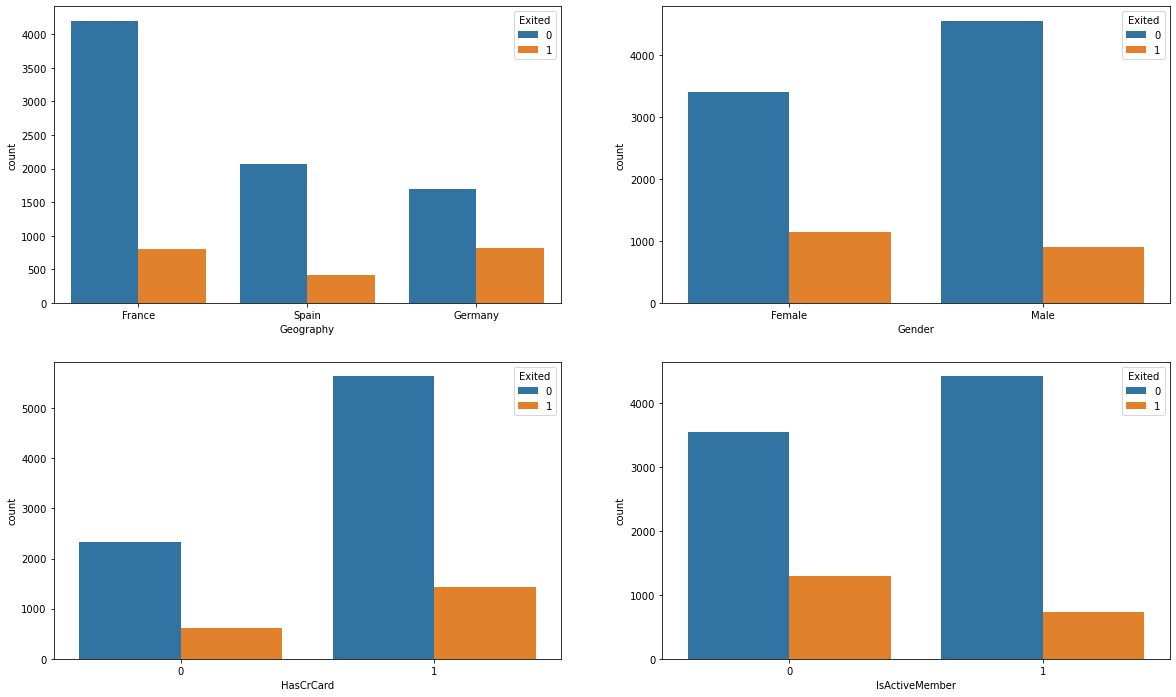

In [18]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])


In [19]:
# Age, Balance, EstimatedSalary, NumOfProducts
print(new_df[["Age", "Balance", "EstimatedSalary", "NumOfProducts"]])
#X=new_df.drop('Exited',axis=1) 
X=new_df[["Age", "Balance", "EstimatedSalary", "NumOfProducts"]]
y=new_df['Exited'] 

      Age    Balance  EstimatedSalary  NumOfProducts
0      42       0.00        101348.88              1
1      41   83807.86        112542.58              1
2      42  159660.80        113931.57              3
3      39       0.00         93826.63              2
4      43  125510.82         79084.10              1
...   ...        ...              ...            ...
9995   39       0.00         96270.64              2
9996   35   57369.61        101699.77              1
9997   36       0.00         42085.58              1
9998   42   75075.31         92888.52              2
9999   28  130142.79         38190.78              1

[10000 rows x 4 columns]


In [20]:
#unique_vals = X['Geography'].unique()
#unique_vals_gender = X['Gender'].unique()
#print(unique_vals)
#print(unique_vals_gender)
#
#X['Geography'].replace(to_replace=unique_vals,
#           value= list(range(len(unique_vals))),
#           inplace=True)
#
#
#X['Gender'].replace(to_replace=unique_vals_gender,
#           value= list(range(len(unique_vals_gender))),
#           inplace=True)
#
## Geo: France= 0, Spain= 1, Germany= 2 
## Gender: Female= 0, Male= 1
#X

In [21]:
# 3, 5, 9, 6
# Age, Balance, Estimated salary, NumOfProducts

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [27]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 5547, 0: 5547})
Testing target statistics: Counter({0: 2416, 1: 584})


Logistic regression

In [28]:
# Import the model
from sklearn.linear_model import LogisticRegression
# Declare an instance of it
classifier = LogisticRegression(solver='lbfgs')
# Fit the model
classifier.fit(X_train,y_train)

LogisticRegression()

In [29]:
# Evaluate the model
print("train: ", classifier.score(X_train, y_train))
print("test: ", classifier.score(X_test, y_test))

#If the accuracy of train is higher then test, there's probably an overfitting.

train:  0.7924285714285715
test:  0.8053333333333333


In [30]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(X_train, y_train)
threshold = 0.5

print(lr.predict(X_test))

lr.predict_proba(X_test)[:,1]

[0 0 0 ... 0 0 0]


array([0.36140165, 0.2035345 , 0.36683267, ..., 0.17513625, 0.35510967,
       0.34889328])

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

# do an oversampling instead over undersampling cause the difference between the metrics is too high.

Cross-Validation Accuracy Scores [0.79214286 0.79214286 0.79214286 0.79285714 0.79285714]


In [32]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=3, random_state=0).fit(X, y)

In [33]:
clf.score(X, y)

0.7963

In [34]:
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

/home/becode/anaconda3/envs/churn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/becode/anaconda3/envs/churn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/becode/anaconda3/envs/churn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

'              precision    recall  f1-score   support\n\n           0       0.81      1.00      0.89      2416\n           1       0.00      0.00      0.00       584\n\n    accuracy                           0.81      3000\n   macro avg       0.40      0.50      0.45      3000\nweighted avg       0.65      0.81      0.72      3000\n'

Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.032 seconds


feature 0    0.256490
feature 1    0.256942
feature 2    0.348612
feature 3    0.137955
dtype: float64


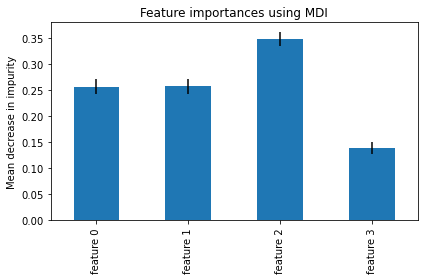

In [38]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)
print(forest_importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# 3, 5, 9, 6
# Age, Balance, Estimated salary, NumOfProducts

In [39]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)

def train_random_forest(X_train, X_test, y_train, y_test):
    
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    return y_pred

In [40]:
y_pred= train_random_forest(X_train, X_test, y_train, y_test)

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
def accuracy(y_pred, y_test):
    
    acc = print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return acc

In [42]:
accur = accuracy(y_pred, y_test)

Accuracy: 0.835


In [43]:
print(f"Traing: {X_train.shape[0]}, Test: {X_test.shape[0]}")

Traing: 7000, Test: 3000


In [44]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.93      0.90      2416\n           1       0.61      0.44      0.51       584\n\n    accuracy                           0.83      3000\n   macro avg       0.74      0.68      0.70      3000\nweighted avg       0.82      0.83      0.82      3000\n'

In [45]:
# check feature imortance

Knn

In [46]:
# Use a KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, y_test)))

The accuracy of the knn classifier is 0.81 out of 1 on training data
The accuracy of the knn classifier is 0.77 out of 1 on test data


In [47]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7703333333333333


I assume there's overfitting in knn

In [48]:
from sklearn.model_selection import cross_val_score

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores.mean:{}'.format(np.mean(cv_scores)))

[0.7325 0.736  0.7265 0.74   0.734 ]
cv_scores.mean:0.7338000000000001


In [49]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.93      0.87      2416\n           1       0.26      0.09      0.14       584\n\n    accuracy                           0.77      3000\n   macro avg       0.53      0.51      0.50      3000\nweighted avg       0.70      0.77      0.73      3000\n'

Good resources used:

https://towardsdatascience.com/how-to-balance-a-dataset-in-python-36dff9d12704

https://medium.com/@lily_su/logistic-regression-accuracy-cross-validation-58d9eb58d6e6

Techniques used: Cross-validation, balancing data (undersampling & oversampling), Feature importance, Classification reporting

Models: Logistic Regression, Random Forest & KNN